* Для початку, дані були завантажені з csv-файлів та зобразені з допомогою бібліотеки Autoviz. 
* Далі були знайдені та оброблені пропущені значення в колонках "Age", "Fare" та "Embarked". 
* Колонка "Cabin" була вилучена, оскільки вона містить занадто багато пропущених значень. 
* Для подальшої обробки були закодовані категоріальні змінні "Sex" та "Embarked" у числові значення. 
* На основі попередньої підготовки даних було виконано кластеризацію за допомогою методу k-середніх (k-means clustering) з використанням різних значень параметру k (кількість кластерів). 
* Для визначення оптимального числа кластерів була використана методологія "Elbow Method". 
* Далі були здійснені зведення до двох головних компонент (principal components analysis, PCA) та відображення кластерів на площині. 
* Згідно з візуалізацією, можна зробити висновок про наявність чотирьох груп пасажирів на базі даних "Titanic", які відрізняються за різними характеристиками (вік, клас кабіни, стать тощо).

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

In [50]:
train_df = pd.read_csv('C:\\Users\\Anna\\Downloads\\titanic\\train.csv')
test_df = pd.read_csv('C:\\Users\\Anna\\Downloads\\titanic\\test.csv')

In [51]:
# Have a look at the datasets
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Shape of your Data Set loaded: (891, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
PassengerId,891,int64,0,0.000000,100.000000,0,possible ID column: drop
Name,891,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
Ticket,681,object,0,0.000000,76.430976,1,combine rare categories
Fare,248,float64,0,0.000000,27.833895,0,skewed: cap or drop outliers
Cabin,147,object,687,77.104377,16.498316,1,"combine rare categories, fill missing, fix mixed data types"
Age,88,float64,177,19.865320,9.876543,0,fill missing
SibSp,7,int64,0,0.000000,0.785634,0,
Parch,7,int64,0,0.000000,0.785634,0,
Pclass,3,int64,0,0.000000,0.336700,0,
Embarked,3,object,2,0.224467,0.336700,77,"fill missing, fix mixed data types"


    12 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['PassengerId']
Number of All Scatter Plots = 3


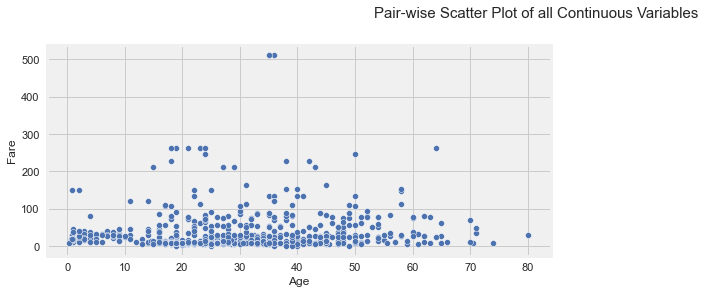

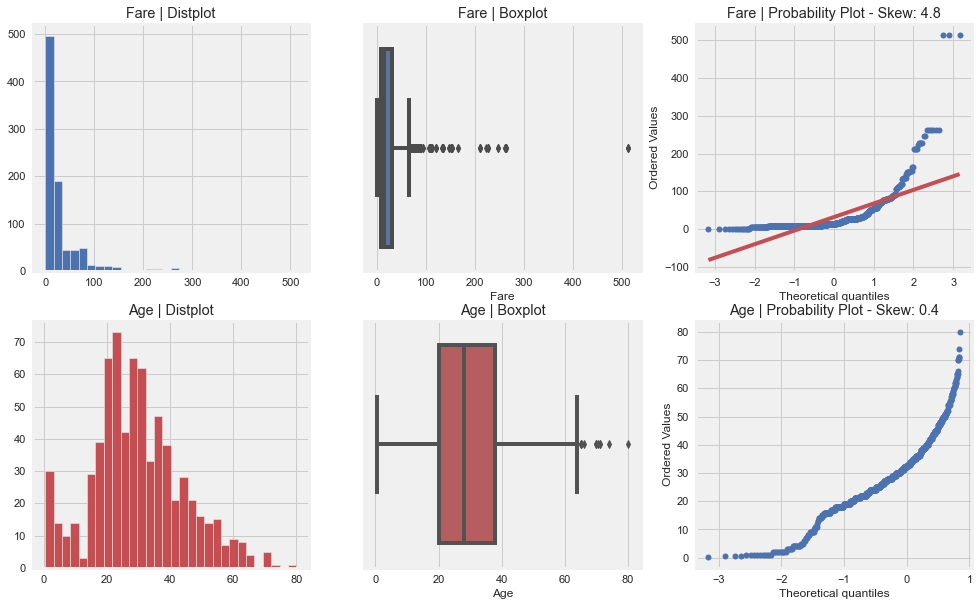

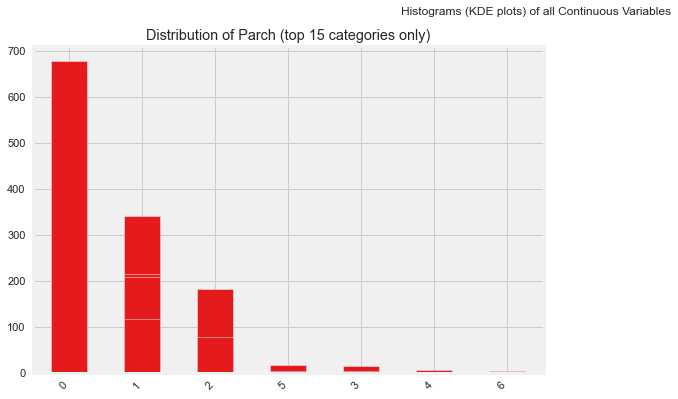

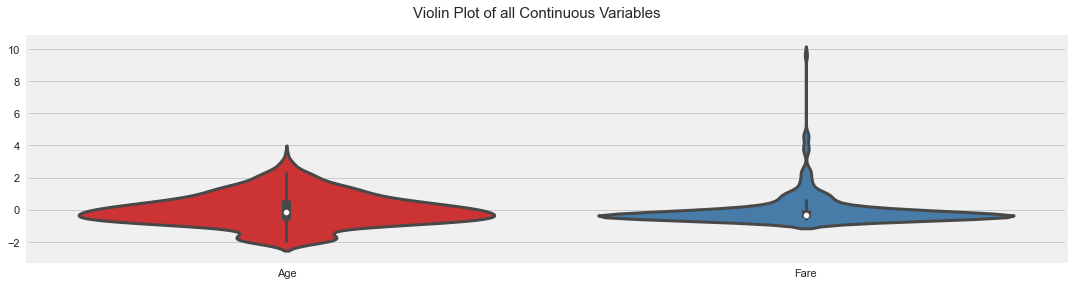

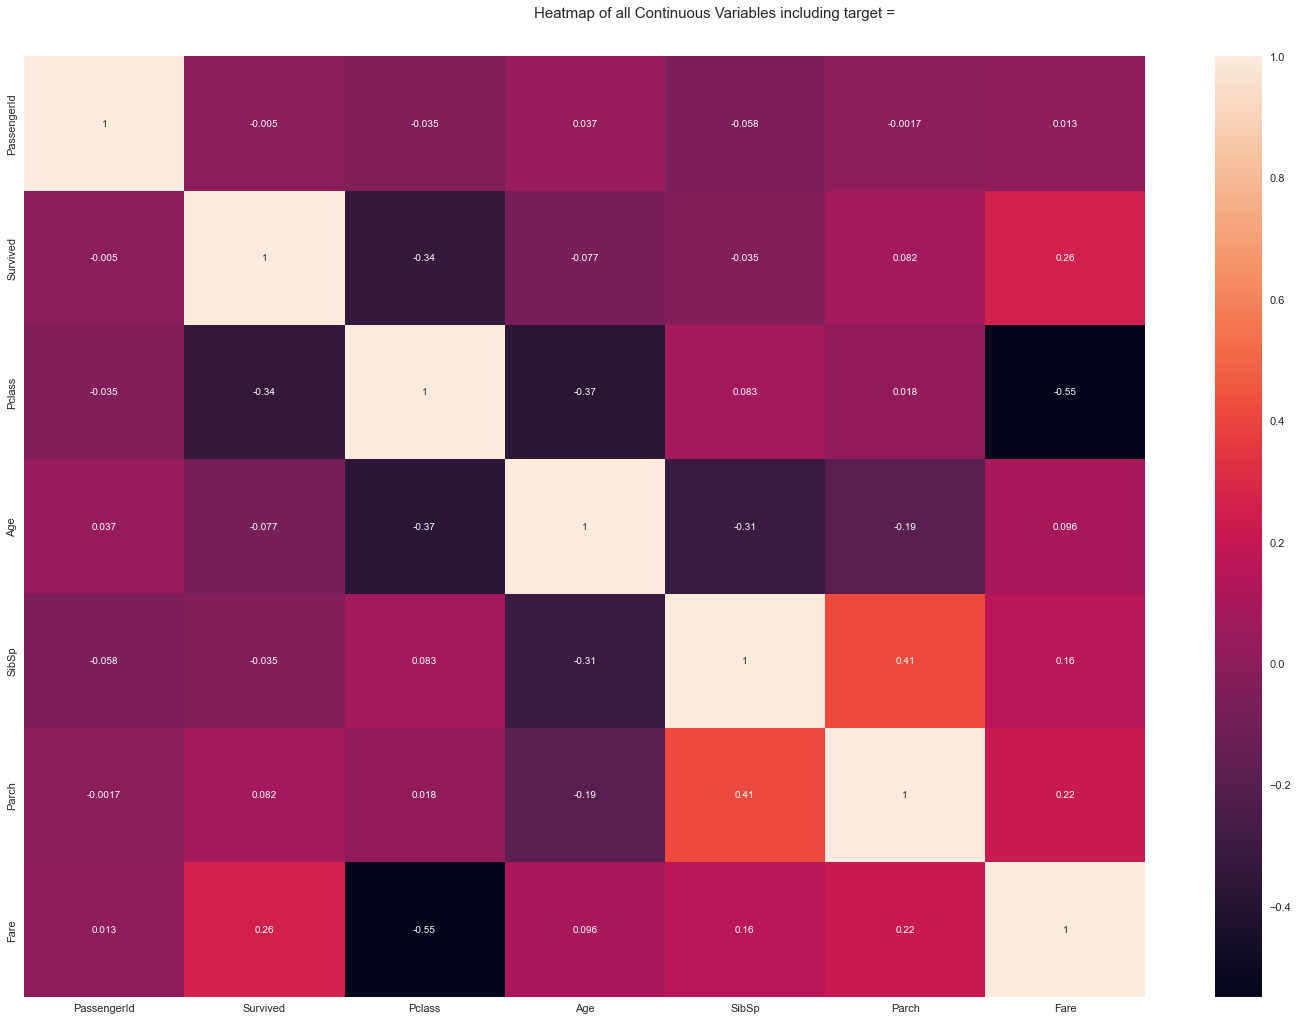

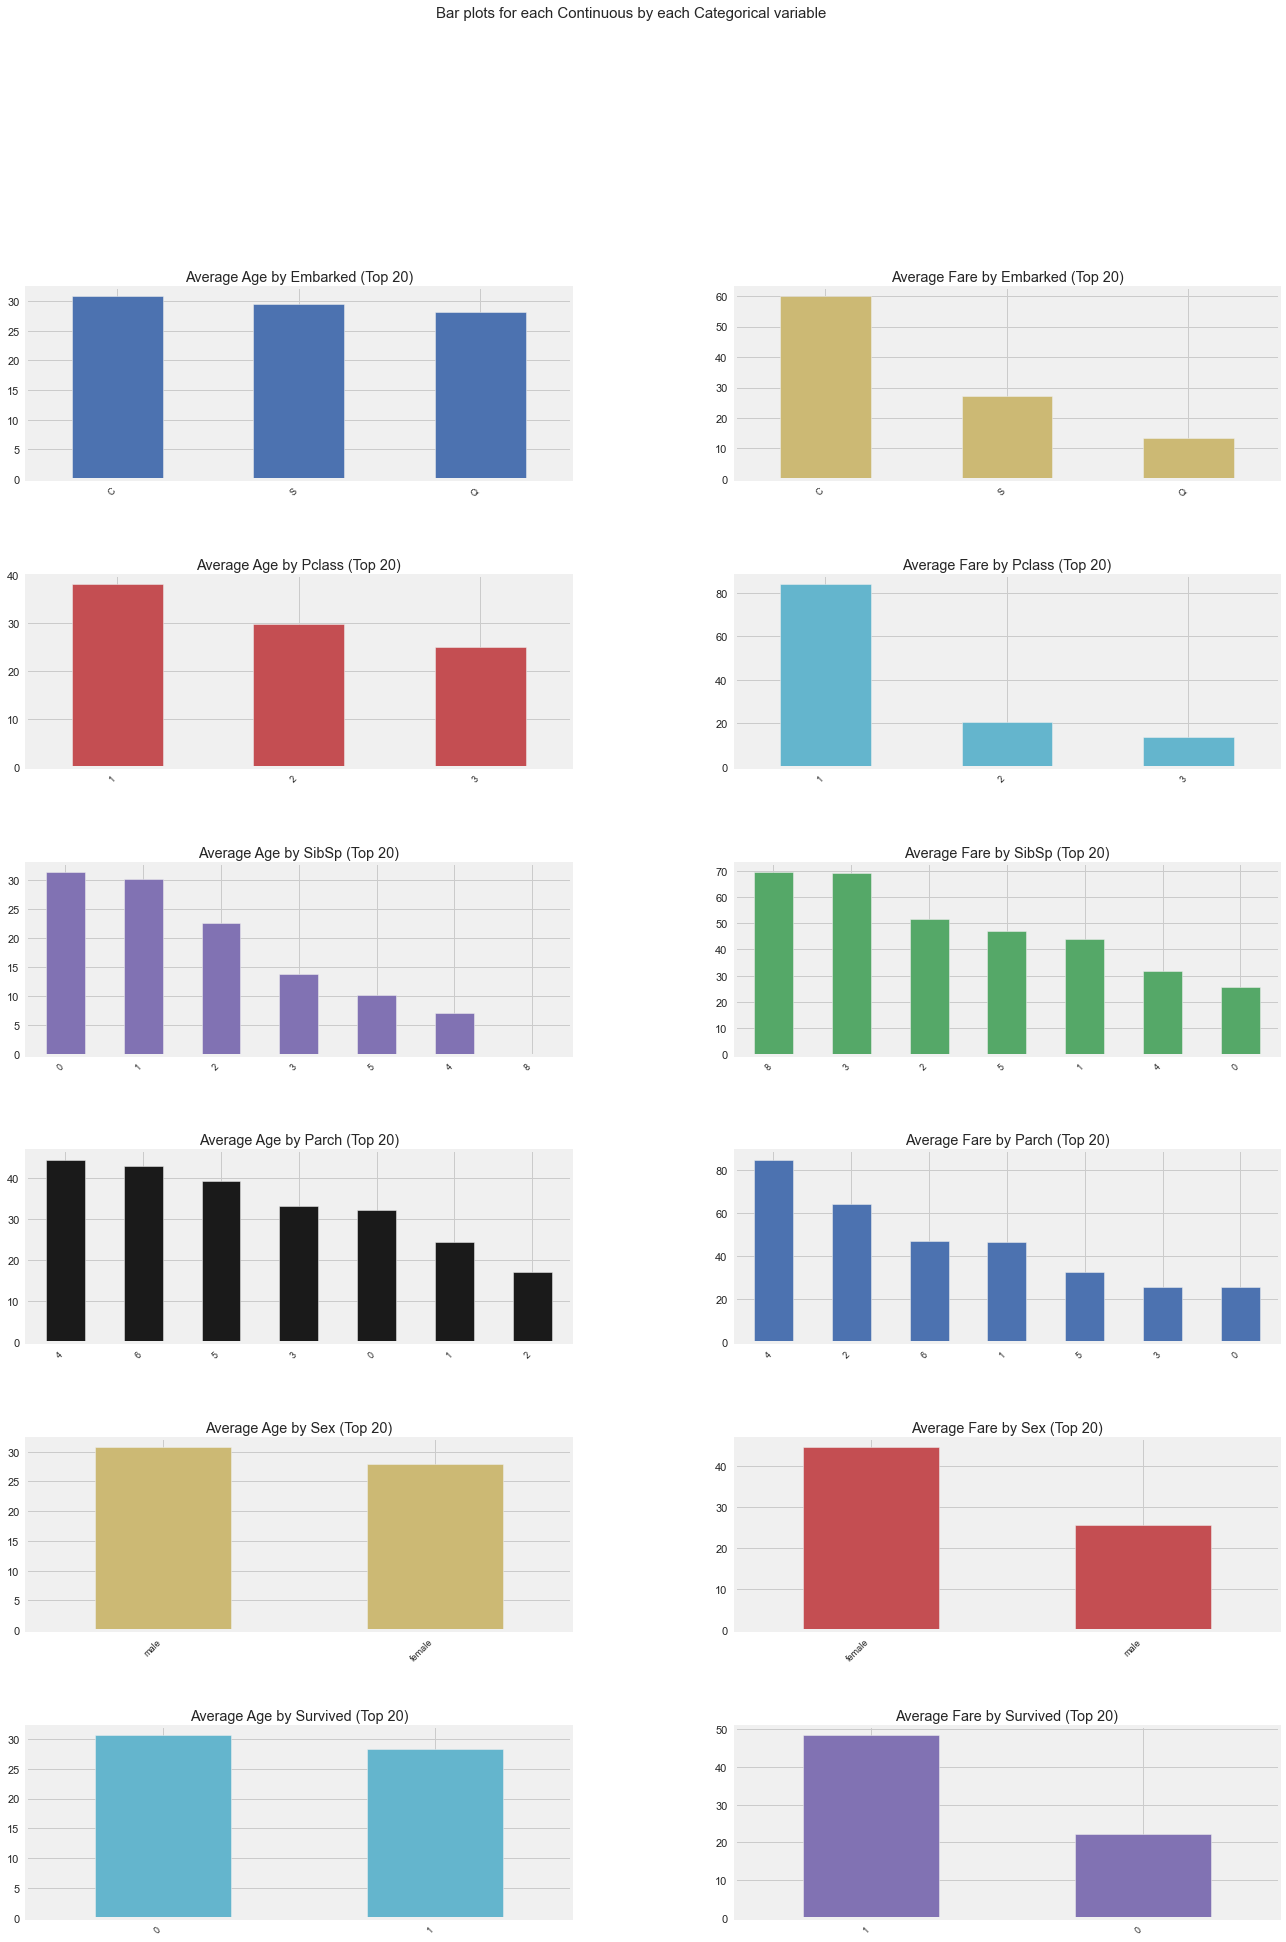

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Anna\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Anna\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Anna\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Anna\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Anna\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

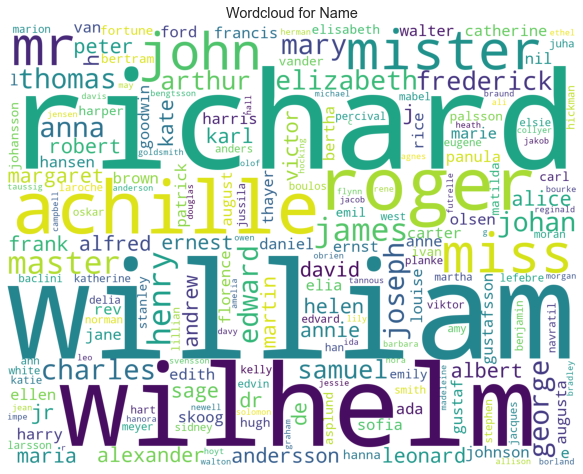

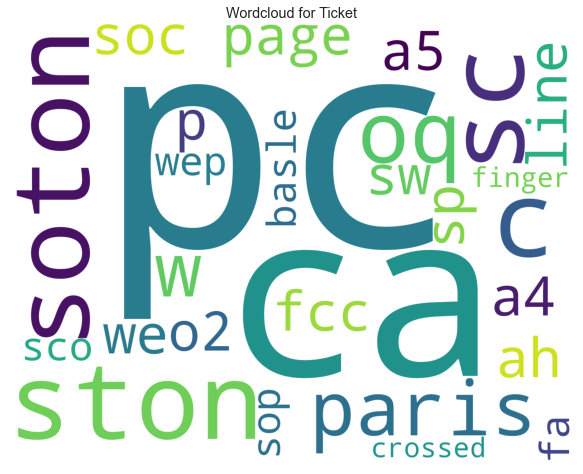

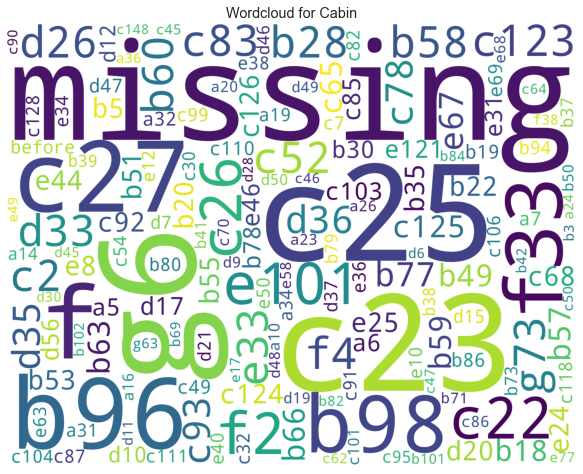

All Plots done
Time to run AutoViz = 11 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [53]:
# Have a closer look at the data we've got
AV = AutoViz_Class()

# Let's now visualize the plots generated by AutoViz.
report = AV.AutoViz('C:\\Users\\Anna\\Downloads\\titanic\\train.csv')

In [54]:
# Check the missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
# Handle missing values in 'Age', 'Fare' and 'Embarked' columns
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [57]:
# Check percentage of missing data in Cabin train + test
cabin_missing_percentage_train = (train_df['Cabin'].isnull().sum() / len(train_df)) * 100
cabin_missing_percentage_test = (test_df['Cabin'].isnull().sum() / len(test_df)) * 100
print(f"Percentage of missing values in: \nTrain Cabin column {cabin_missing_percentage_train} \nTest Cabin column {cabin_missing_percentage_test}", )

Percentage of missing values in: 
Train Cabin column 77.10437710437711 
Test Cabin column 78.22966507177034


In [58]:
# As too many missing data in 'Cabin' think it's better to drop this column. Also drop some useless data of 'Name', 'Ticket', 'ID'
train_df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis=1, inplace=True)
test_df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis=1, inplace=True)

In [59]:
# Convert 'Sex' and 'Embarked' columns to numerical values
train_df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
test_df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [60]:
# Have a look at what we have now, after preprocessing 
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [61]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [94]:
# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(train_df)
Y = scaler.fit_transform(test_df)

In [95]:
# Carrying out elbow clustering with different k parameters to check which number of clasters is the best
inertias = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

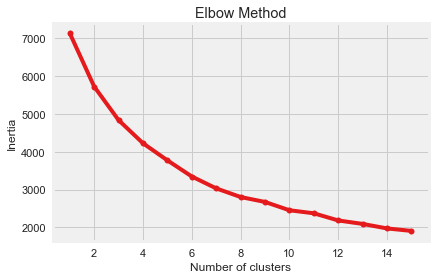

In [96]:
# Visualization and choosing number of clasters
plt.plot(range(1, 16), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [97]:
# Looks like 4 clasters is the best choice. Make final clastorization for test data

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(Y)
labels = kmeans.labels_

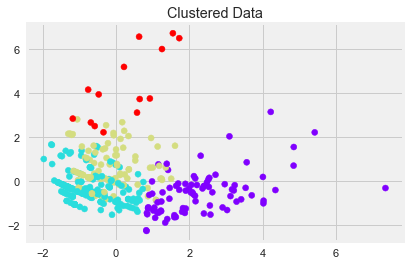

In [98]:
# Show results on the graphic
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(Y)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='rainbow')
plt.title('Clustered Data')
plt.show()